<a href="https://colab.research.google.com/github/Art-phys/Lesson_HF_LR_Unit1/blob/main/Lesson_HF_RL_Unit1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt install swig cmake

Reading package lists... Done
Building dependency tree       
Reading state information... Done
cmake is already the newest version (3.10.2-1ubuntu2.18.04.2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
Suggested packages:
  swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  swig swig3.0
0 upgraded, 2 newly installed, 0 to remove and 20 not upgraded.
Need to get 1,100 kB of archives.
After this operation, 5,822 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig3.0 amd64 3.0.12-1 [1,094 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig amd64 3.0.12-1 [6,460 B]
Fetched 1,100 kB in 2s (525 kB/s)
Selecting previously unselected package swig3.0.
(Reading database ... 124016 files and directories currently installed.)
Preparing to unpack .../swig3.0_3.0.12-1_amd64.deb ...
Unpack

## Установка рекомендуемых зависимостей


In [2]:
!pip install -r https://huggingface.co/spaces/ThomasSimonini/temp-space-requirements/raw/main/requirements/requirements-unit1.txt


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 170 kB 29.6 MB/s 
     |████████████████████████████████| 1.3 MB 50.7 MB/s 
     |████████████████████████████████| 425 kB 30.8 MB/s 
     |████████████████████████████████| 1.0 MB 46.7 MB/s 
     |████████████████████████████████| 182 kB 62.9 MB/s 
     |████████████████████████████████| 1.5 MB 58.7 MB/s 
     |████████████████████████████████| 237 kB 75.3 MB/s 
     |████████████████████████████████| 1.6 MB 63.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Using cached libtorrent-2.0.7-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (8.6 MB)
     |████████████████████████████████| 51 kB 7.9 MB/s 
  Created wheel for box2d-kengz: filename=Box2D_kengz-2.3.3-cp38-cp38-linux_x86_64.whl size=2037598 sha256=b638ae654ca04c43ae9d2864292d9df4e8e4e5c68acbb928b5

Чтобы иметь возможность отображать среду, с помощью colab, нам нужен виртуальный экран, следующая ячейка установит библиотеки виртуальных экранов:

In [3]:
!sudo apt-get update
!apt install python-opengl
!apt install ffmpeg
!apt install xvfb
!pip3 install pyvirtualdisplay

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:5 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:14 http://ppa.launchpad.net

*Чтобы убедиться, что новые установленные библиотеки используются, иногда требуется перезапустить среду выполнения notebook. Следующая ячейка приведет к сбою среды выполнения, поэтому вам нужно будет снова подключиться и запустить код, начиная отсюда. Благодаря этому трюку мы сможем запустить наш виртуальный экран.*

In [ ]:
import os
os.kill(os.getpid(), 9)

In [1]:
# Virtual display
from pyvirtualdisplay import Display

virtual_display = Display(visible=0, size=(1400, 900))
virtual_display.start()

## Импорт пакетов(библиотек)  📦

Одна дополнительная библиотека, которую мы импортируем, - это **huggingface_hub**, чтобы иметь возможность загружать обученные модели из концентратора.

**Hugging Face Hub** 🤗 работает как сервер, где любой желающий может делиться моделями и наборами данных и изучать их. В нем есть управление версиями, метрики, визуализации и другие функции, которые позволяют легко сотрудничать с другими.

Вы можете увидеть здесь все доступные модели обучения с глубоким подкреплением

In [2]:
import gym

from huggingface_sb3 import load_from_hub, package_to_hub, push_to_hub
from huggingface_hub import notebook_login # To log to our Hugging Face account to be able to upload models to the Hub.

from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.env_util import make_vec_env

## Что такое тренажерный зал и как он работает 🤖

🏋 Библиотека среды(environment) называется Gym. Тренажерный зал часто используется тренажерный зал для глубокого обучения с подкреплением.

Библиотека тренажерного зала предоставляет две возможности:
1. Интерфейс, который позволяет создавать среды RL;
2. Набор сред (gym-control, atari, Box2D...).

## Цикл RL:

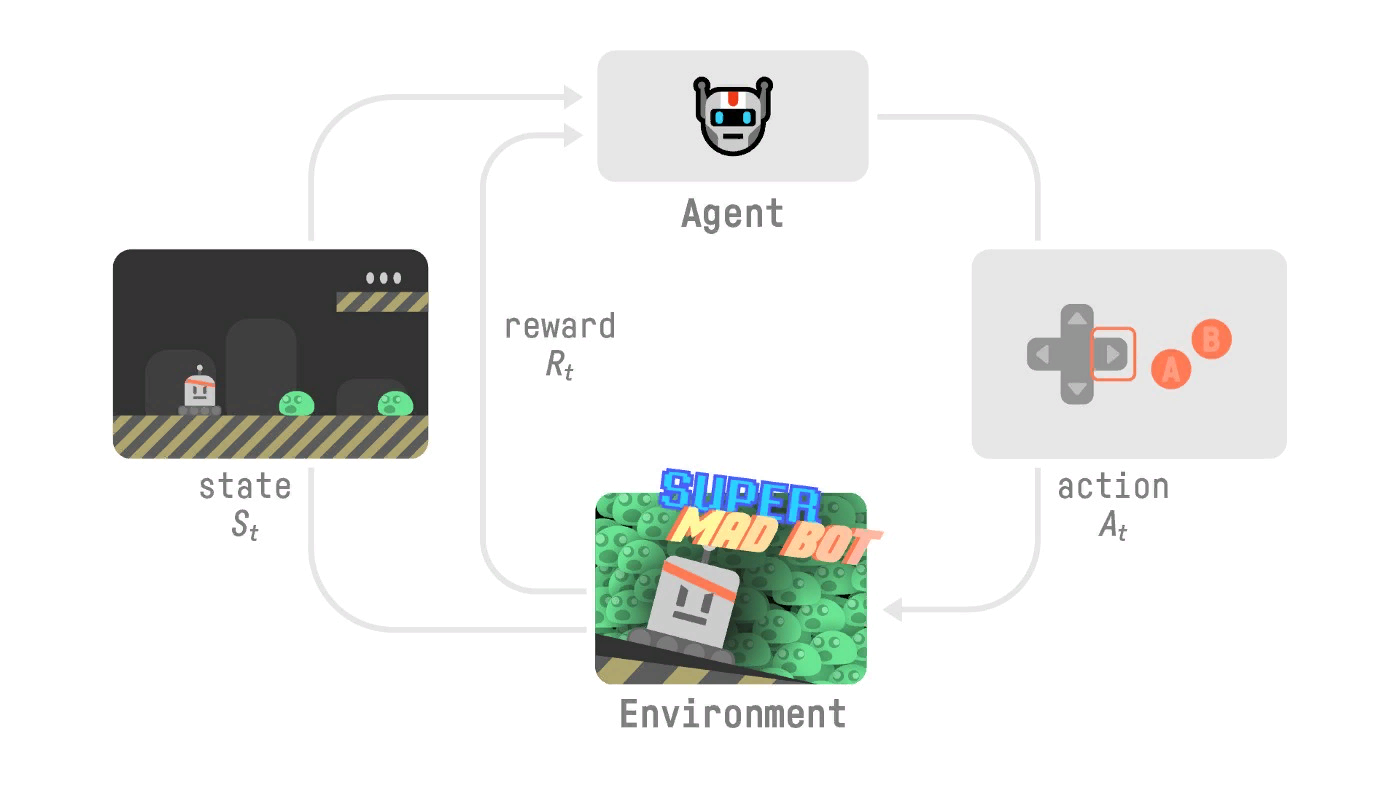

***На каждом шаге:***

*   Наш агент получает **состояние S0** из окружения — мы получаем первый кадр нашей игры (окружения).
*   Основываясь на этом **состоянии S0**, Агент выполняет действие A0 — наш агент переместится вправо.
*   Среда перейдет в **новое состояние S1** — новый фрейм.
Если Агент не мертв, окружающая среда дает Агенту некоторую награду R1 —**положительная награда +1**.

***С тренажерным залом:***

1️⃣ Мы создаем нашу среду с помощью:  gym.make()

2️⃣ Мы возвращаем среду в исходное состояние с помощью : observation = env.reset()

На каждом шаге:

3️⃣ Получаем действие Агента, используя нашу модель (в нашем примере мы выполняем случайное действие)

4️⃣ Используя env.step(действие), мы выполняем это действие в среде и получаем

наблюдение: Новое состояние (st+1)
награда: Награда, которую мы получаем после выполнения выполненного действия
: Указывает, закончился ли эпизод
Информация: Словарь, который предоставляет дополнительную информацию (зависит от среды).
Если эпизод закончен:

Мы возвращаем среду в исходное состояние с помощью